

---


# 📊 Proyecto de Análisis de Sentimientos de Tweets

## 🎯 Problema de Negocio

El objetivo de este proyecto es analizar los sentimientos de los tweets, identificando si los mensajes son positivos o negativos. Utilizando un conjunto de datos de 1,600,000 tweets preprocesados, se pretende generar diversas características que se utilizarán para entrenar un modelo de clasificación.

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('datatotal.csv')

In [ ]:
X = df.drop(columns=['Unnamed: 0', 'target', 'text', 'date', 'cleaned_text'])
y = df['target']

In [ ]:
# Verificar las dimensiones de las variables
print(f"Dimensión de X (variables predictoras): {X.shape}")
print(f"Dimensión de y (variable objetivo): {y.shape}")

Dimensión de X (variables predictoras): (1599999, 15)
Dimensión de y (variable objetivo): (1599999,)


In [ ]:
# Primero, dividir en train (70%) y test (30%)

# Ahora dividir X_temp en test (50%) y validation (50%)

# Verificar las dimensiones después del split
print(f"Conjunto de entrenamiento (train): {X_train.shape}, {y_train.shape}")
print(f"Conjunto de prueba (test): {X_test.shape}, {y_test.shape}")
print(f"Conjunto de validación (validation): {X_val.shape}, {y_val.shape}")

Conjunto de entrenamiento (train): (1119999, 15), (1119999,)
Conjunto de prueba (test): (240000, 15), (240000,)
Conjunto de validación (validation): (240000, 15), (240000,)


## Análisis Exploratorio

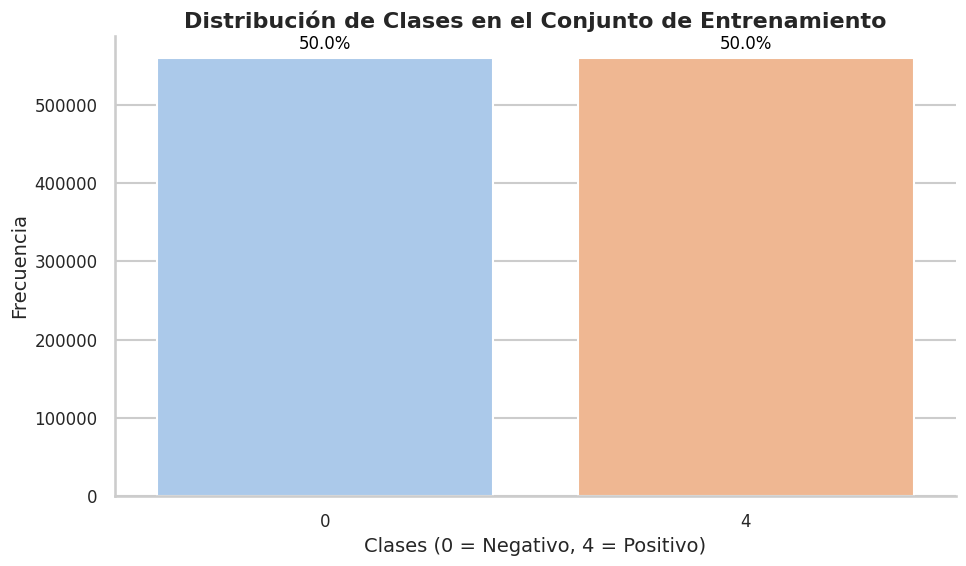

In [ ]:
# @title Target
if not isinstance(y_train, pd.Series):
    y_train = pd.Series(y_train, name='target')

# Crear un DataFrame con y_train
df = pd.DataFrame({'target': y_train})

# Configurar el estilo de Seaborn
sns.set(style="whitegrid", context="talk")

# Crear una figura de tamaño adecuado
plt.figure(figsize=(10, 6))

# Gráfico de barras para ver la distribución del target
ax = sns.countplot(
    data=df,
    x='target',
    palette="pastel",
    order=sorted(df['target'].unique())
)

# Añadir porcentajes encima de cada barra
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y + total*0.01),
                ha='center', fontsize=12, color='black')

# Añadir títulos y etiquetas con formato
ax.set_title("Distribución de Clases en el Conjunto de Entrenamiento", fontsize=16, fontweight='bold')
ax.set_xlabel("Clases (0 = Negativo, 4 = Positivo)", fontsize=14)
ax.set_ylabel("Frecuencia", fontsize=14)

# Personalizar las etiquetas de los ejes
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Quitar bordes superiores y derechos
sns.despine()

# Ajustar el diseño para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
# @title Descripción
pd.options.display.float_format = "{:.2f}".format
# Descripción de las variables numéricas en el conjunto de entrenamiento
X_train.describe()

,tweet_length,emoji_count,exclamation_count,question_count,capital_word_density,word_count,stopword_count,unique_word_count,repeated_word_proportion,textblob_subjectivity,punctuation_count,mention_count,hashtag_count,text_entropy,sarcasm
count,1119999.00,1119999.00,1119999.00,1119999.00,1119999.00,1119999.00,1119999.00,1119999.00,1119999.00,1119999.00,1119999.00,1119999.00,1119999.00,1119999.00,1119999.00
mean,64.21,0.00,0.57,0.15,0.05,12.50,5.22,11.82,0.04,0.40,3.98,0.50,0.03,2.56,0.00
std,34.32,0.12,1.33,0.98,0.10,6.90,3.60,6.25,0.06,0.34,3.43,0.59,0.23,0.26,0.07
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00
25%,36.00,0.00,0.00,0.00,0.00,7.00,2.00,7.00,0.00,0.00,2.00,0.00,0.00,2.48,0.00
50%,59.00,0.00,0.00,0.00,0.00,11.00,5.00,11.00,0.00,0.40,3.00,0.00,0.00,2.63,0.00
75%,91.00,0.00,1.00,0.00,0.07,18.00,8.00,17.00,0.07,0.67,6.00,1.00,0.00,2.72,0.00
max,351.00,81.00,98.00,111.00,1.00,40.00,40.00,36.00,0.96,1.00,119.00,12.00,24.00,3.85,1.00


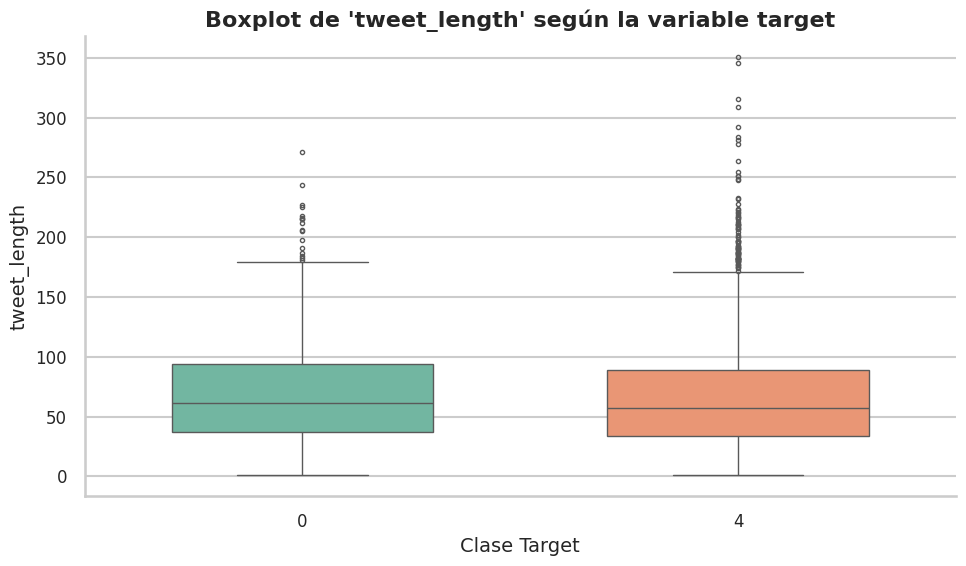

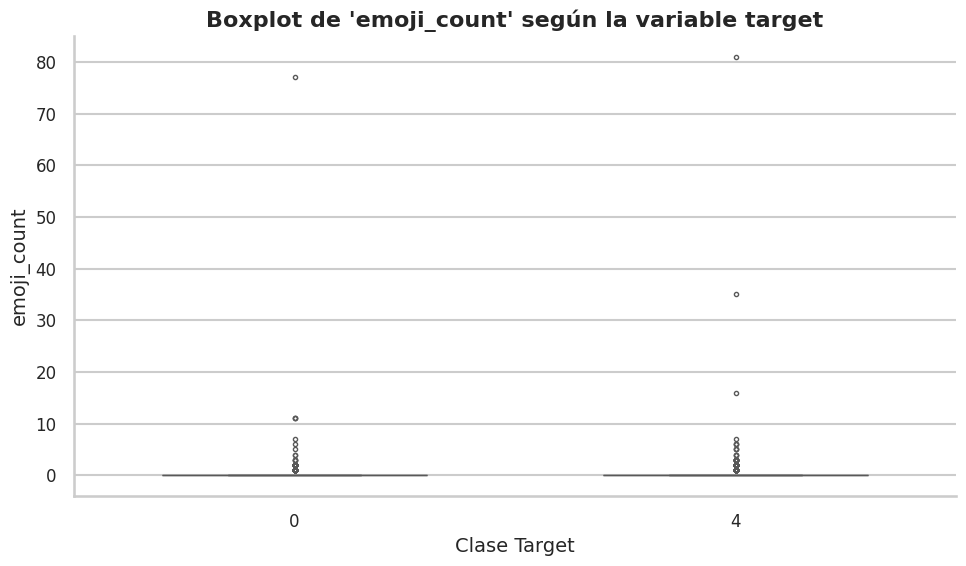

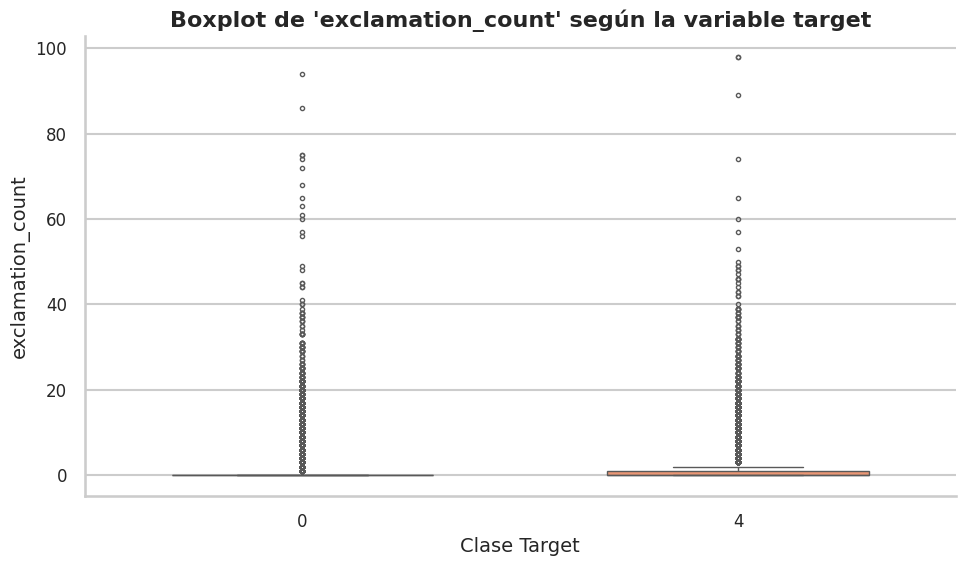

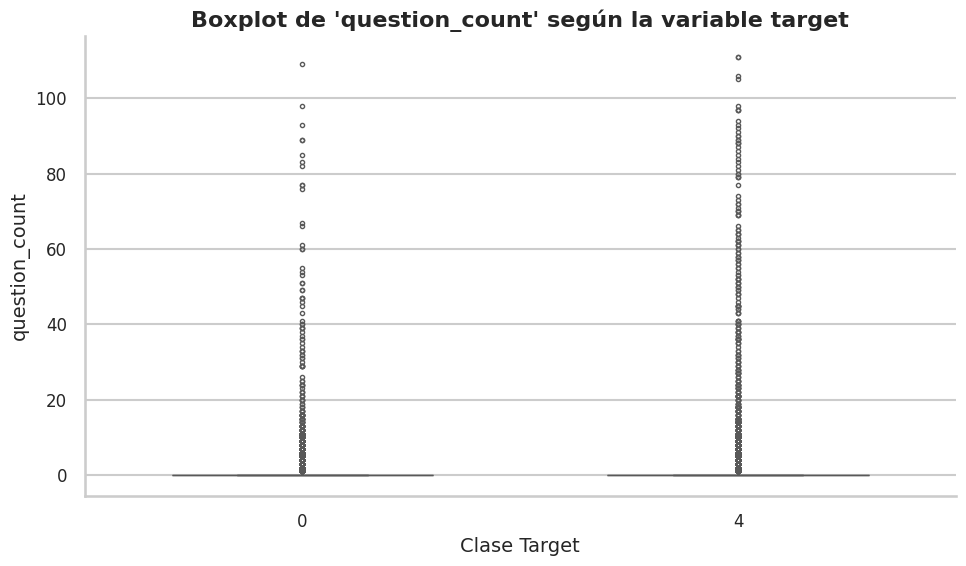

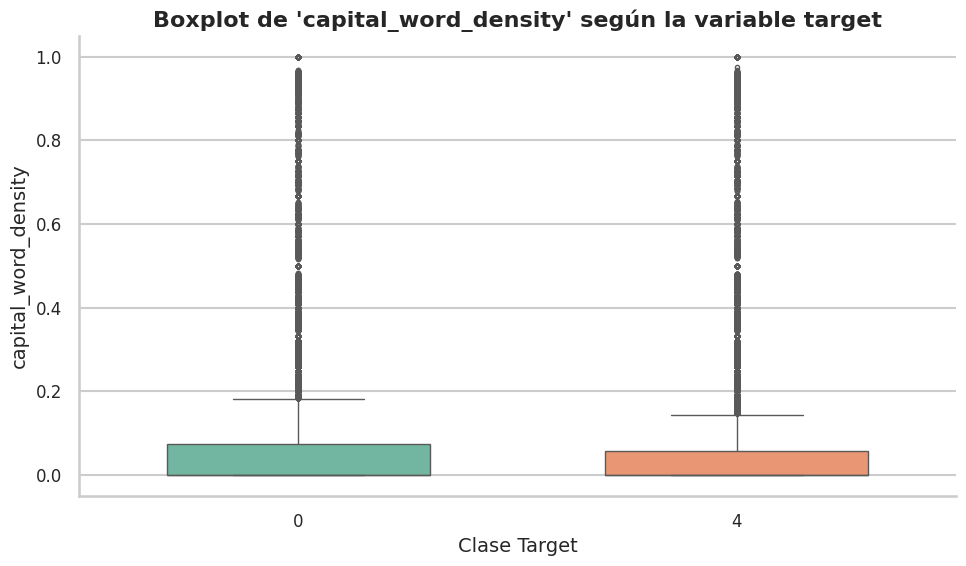

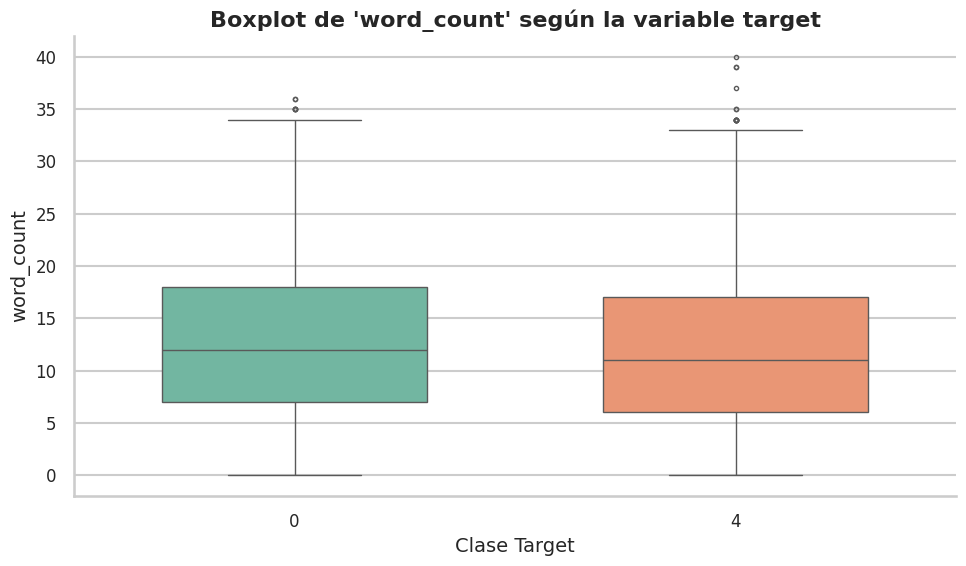

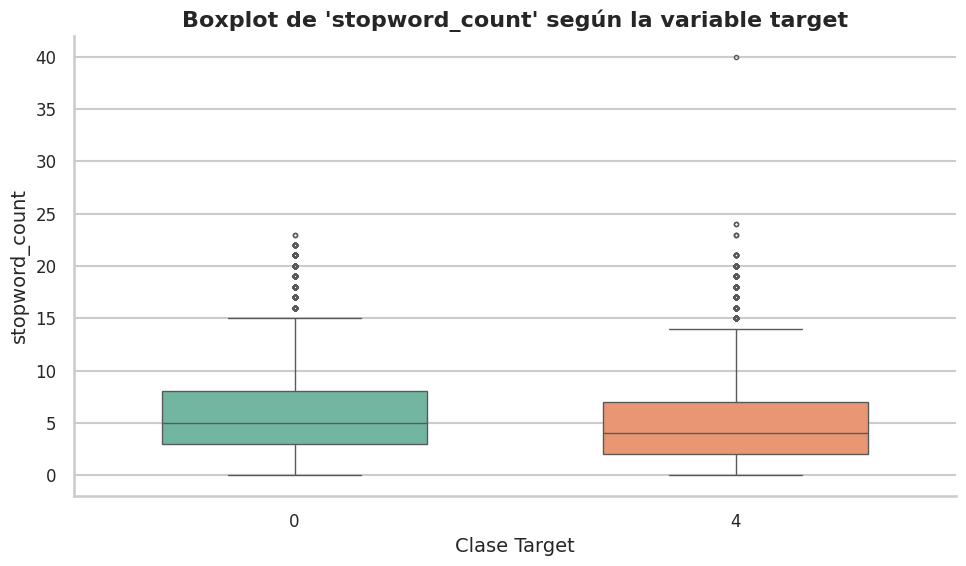

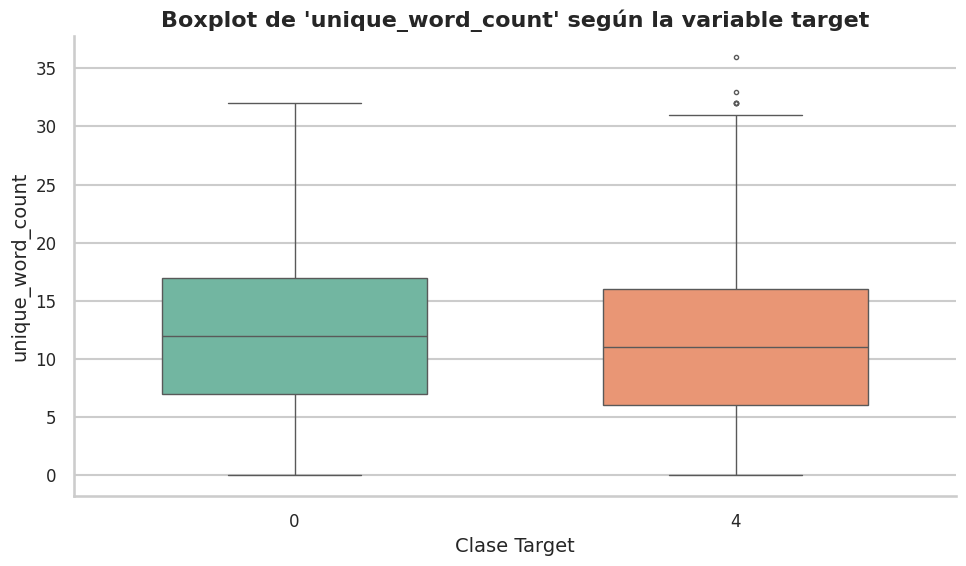

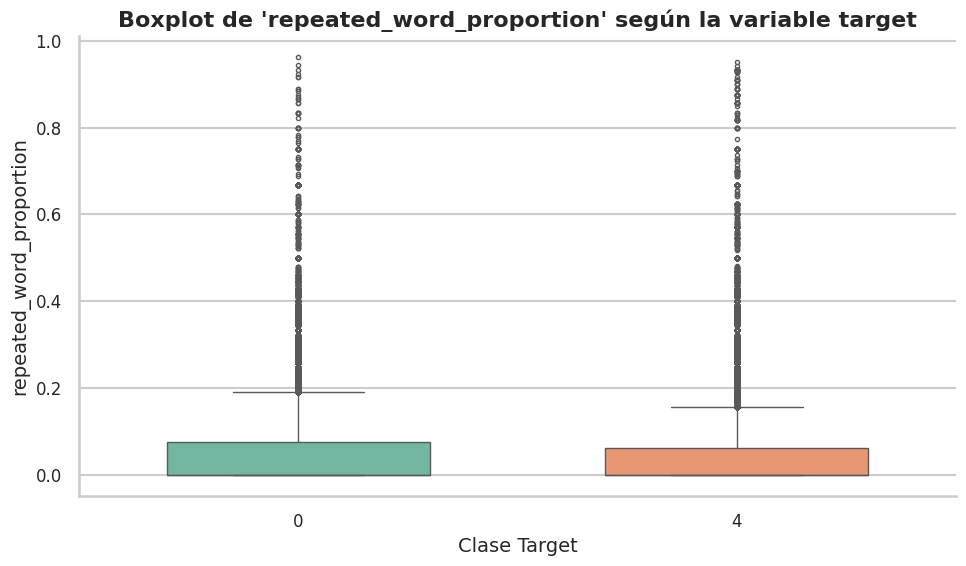

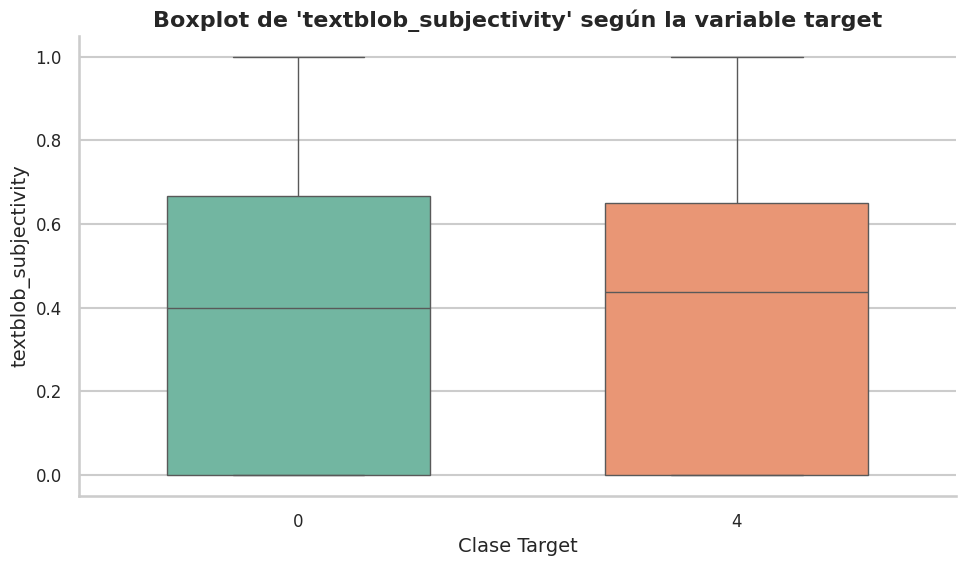

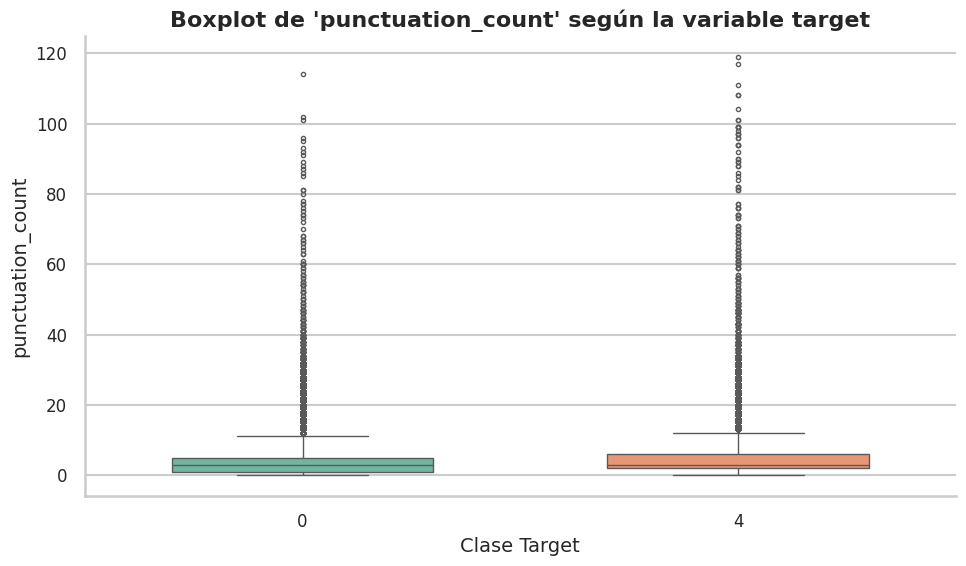

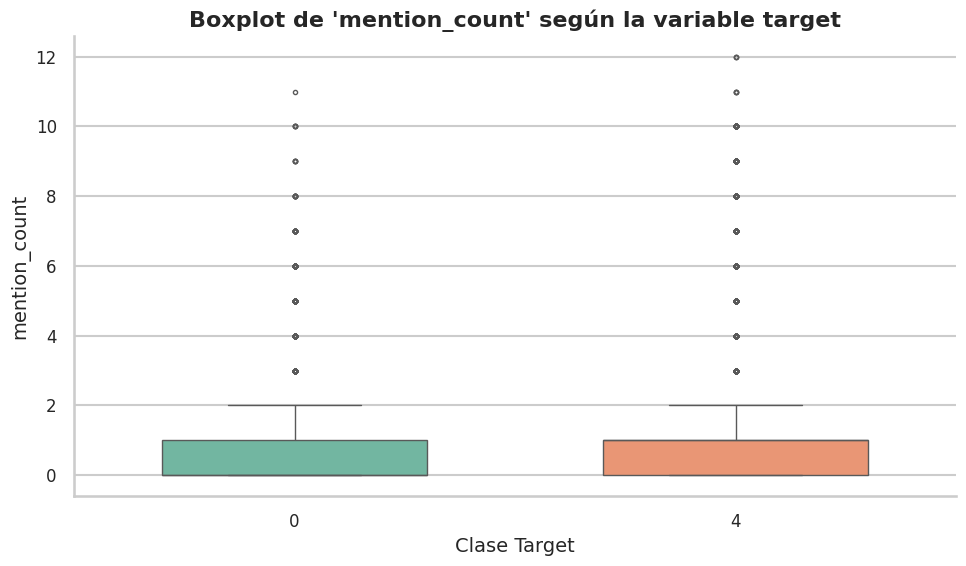

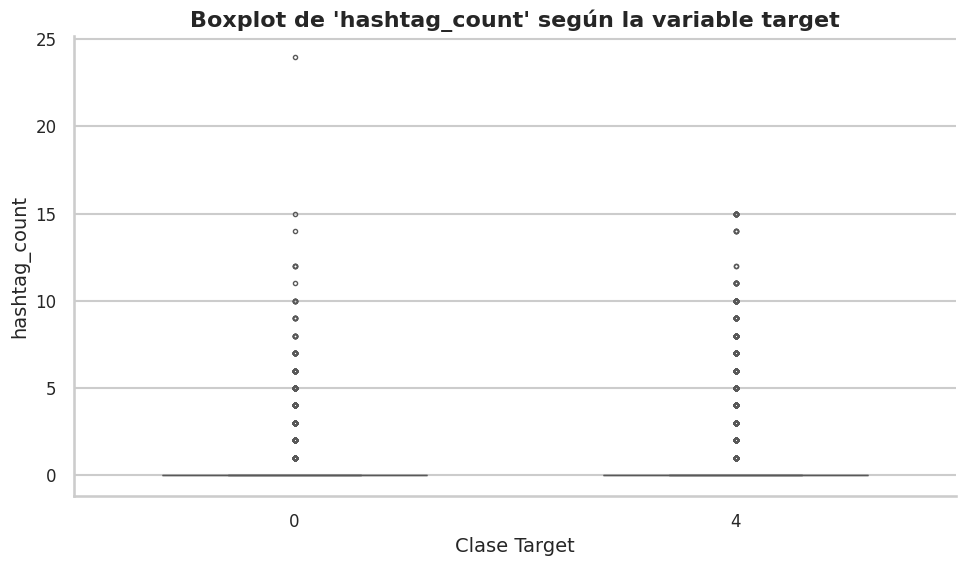

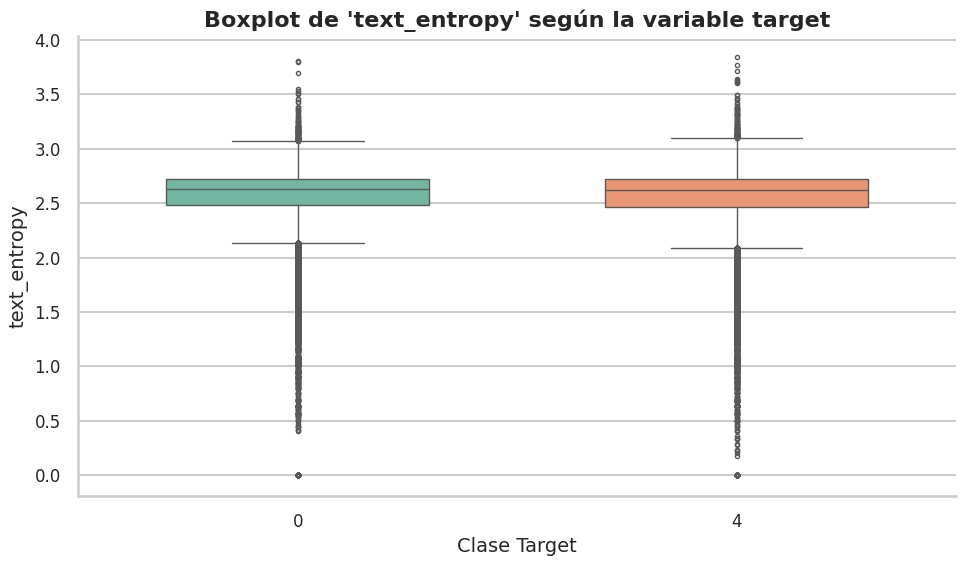

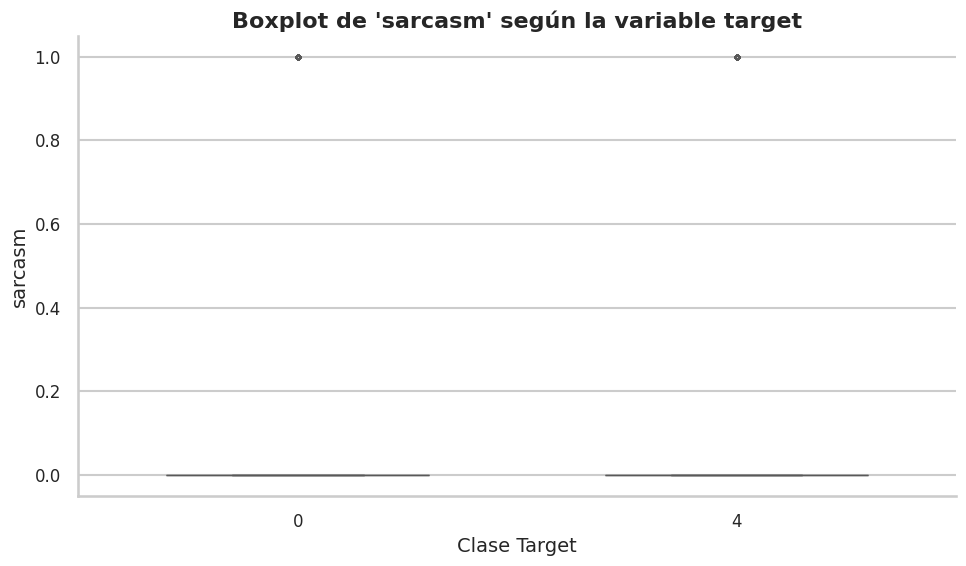

In [ ]:
# @title Bivariado Visual
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_simple_boxplot(df, feature):
    plt.figure(figsize=(10, 6))

    sns.set(style="whitegrid", context="talk")

    # Crear el boxplot ajustado
    ax = sns.boxplot(
        x='target',
        y=feature,
        data=df,
        palette='Set2',
        width=0.6,
        fliersize=3  # Tamaño de los outliers
    )

    # Añadir títulos y etiquetas con formato
    plt.title(f"Boxplot de '{feature}' según la variable target", fontsize=16, fontweight='bold')
    plt.xlabel("Clase Target", fontsize=14)
    plt.ylabel(feature, fontsize=14)

    # Personalizar las etiquetas de los ejes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Quitar bordes superiores y derechos
    sns.despine()

    # Ajustar el diseño para evitar recortes
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

# Asegurarse de que y_train es una Serie de pandas con el nombre 'target'
if not isinstance(y_train, pd.Series) or y_train.name != 'target':
    y_train = pd.Series(y_train, name='target')

# Combinar X_train y y_train
data = pd.concat([X_train, y_train], axis=1)

# Filtrar solo las columnas numéricas
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

# Ejecutar la función para cada variable numérica
for col in numerical_columns:
    plot_simple_boxplot(data, col)

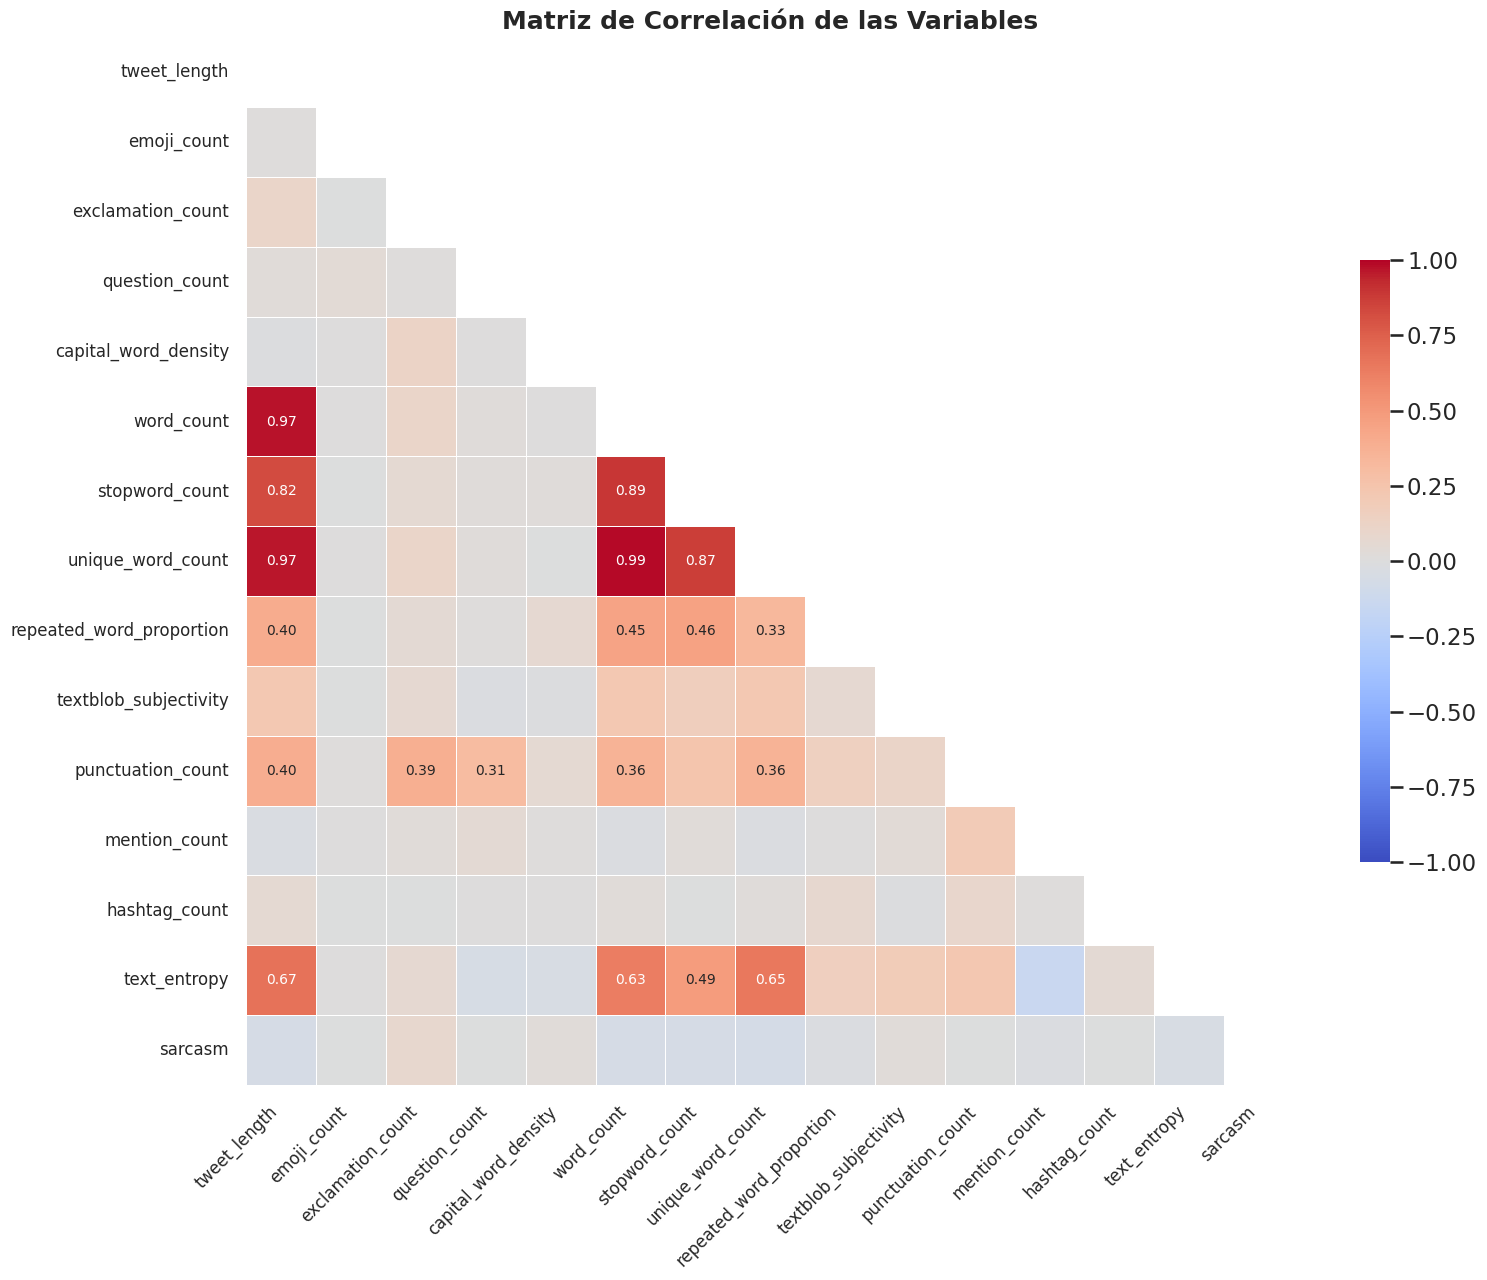

In [ ]:
# @title Matriz de correlación
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar el estilo de Seaborn
sns.set(style="white", context="talk")

# Generar la matriz de correlación
corr = X_train.corr()

# Generar una máscara para ocultar la mitad superior de la matriz
mask = np.triu(np.ones_like(corr, dtype=bool))

# Crear una figura de tamaño adecuado
plt.figure(figsize=(16, 14))

# Función para formatear las anotaciones
def corr_fmt(x):
    if np.isnan(x):
        return ''
    elif abs(x) >= 0.3:  # Mostrar solo correlaciones con valor absoluto >= 0.3
        return f"{x:.2f}"
    else:
        return ''

# Generar un mapa de calor personalizado
sns.heatmap(
    corr,
    mask=mask,
    annot=corr.applymap(corr_fmt),
    fmt='',
    cmap='coolwarm',
    vmax=1.0,
    vmin=-1.0,
    center=0,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    square=True,
    annot_kws={"size": 10}  # Reducir el tamaño de la fuente de las anotaciones
)

# Añadir títulos y etiquetas
plt.title("Matriz de Correlación de las Variables", fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Ajustar el diseño para evitar recortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
y_train.replace({4: 1}, inplace=True)
y_test.replace({4: 1}, inplace=True)
y_val.replace({4: 1}, inplace=True)

In [ ]:
from sklearn.experimental import enable_halving_search_cv  # Import necesario para Halving
from sklearn.model_selection import HalvingGridSearchCV
import xgboost as xgb

# Definir el modelo base de XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='auc')

# Definir los hiperparámetros a evaluar
param_grid = {
# Aquí tu código
}

# Crear el Halving Grid Search con validación cruzada
halving_search = HalvingGridSearchCV(
# Aquí tu código
)

# Entrenar el modelo con Halving Grid Search

# Ver los mejores hiperparámetros

In [ ]:
# Entrenar el modelo con los mejores parámetros

# Predecir los valores en el conjunto de test

In [ ]:


# Crear un DataFrame para mostrar las importancias con sus respectivas variables
feature_importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importances
})

# Ordenar las variables por importancia
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Mostrar las 10 variables más importantes
print(feature_importance_df)

                    Variable  Importancia
11             mention_count         0.34
2          exclamation_count         0.19
14                   sarcasm         0.10
6             stopword_count         0.07
4       capital_word_density         0.05
10         punctuation_count         0.05
9      textblob_subjectivity         0.04
5                 word_count         0.04
7          unique_word_count         0.03
13              text_entropy         0.02
12             hashtag_count         0.02
8   repeated_word_proportion         0.02
0               tweet_length         0.02
3             question_count         0.01
1                emoji_count         0.00


Precisión del modelo en el conjunto de prueba: 0.62
Reporte de clasificación:
              precision    recall  f1-score   support

    Negativo       0.62      0.63      0.62    120000
    Positivo       0.62      0.61      0.62    120000

    accuracy                           0.62    240000
   macro avg       0.62      0.62      0.62    240000
weighted avg       0.62      0.62      0.62    240000



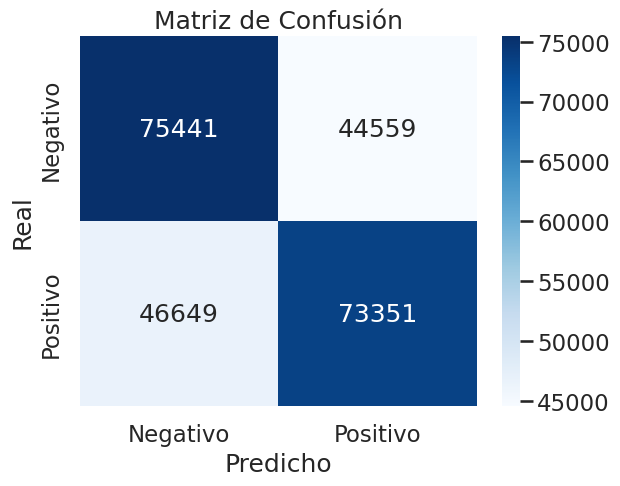

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Métrica de precisión global (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo en el conjunto de prueba: {accuracy:.2f}")

# Reporte de clasificación
print("Reporte de clasificación:")
# Modificar los target names ya que solo hay dos categorías
print(classification_report(y_test, y_pred, target_names=['Negativo', 'Positivo']))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Negativo', 'Positivo'],
            yticklabels=['Negativo', 'Positivo'])
plt.title("Matriz de Confusión")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# Generemos un LighGBM

In [ ]:
import lightgbm as lgb

# Definir el modelo base de LightGBM
lgb_model = lgb.LGBMClassifier()

# Definir los hiperparámetros a evaluar
param_grid = {
# Aquí tu código
}

# Crear el Halving Grid Search con validación cruzada
halving_search = HalvingGridSearchCV(
# Aquí tu código
)

# Entrenar el modelo con Halving Grid Search

# Ver los mejores hiperparámetros

In [ ]:
# Entrenar el modelo con los mejores parámetros

# Predecir los valores en el conjunto de test

In [ ]:
# Crear un DataFrame para mostrar las importancias con sus respectivas variables
feature_importance_df = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': importances
})

# Ordenar las variables por importancia
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Mostrar las 10 variables más importantes
print(feature_importance_df)

                    Variable  Importancia
9      textblob_subjectivity         1166
5                 word_count          727
6             stopword_count          696
13              text_entropy          600
7          unique_word_count          505
4       capital_word_density          458
0               tweet_length          453
10         punctuation_count          442
3             question_count          231
2          exclamation_count          224
8   repeated_word_proportion          196
14                   sarcasm          189
11             mention_count          175
12             hashtag_count           82
1                emoji_count            1


Precisión del modelo en el conjunto de prueba: 0.61
Reporte de clasificación:
              precision    recall  f1-score   support

    Negativo       0.61      0.62      0.62    120000
    Positivo       0.62      0.60      0.61    120000

    accuracy                           0.61    240000
   macro avg       0.61      0.61      0.61    240000
weighted avg       0.61      0.61      0.61    240000



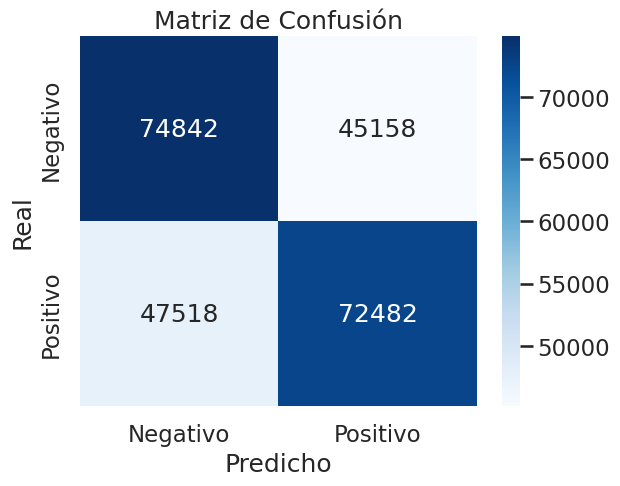

In [ ]:
# Métrica de precisión global (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo en el conjunto de prueba: {accuracy:.2f}")

# Reporte de clasificación
print("Reporte de clasificación:")
# Modificar los target names ya que solo hay dos categorías
print(classification_report(y_test, y_pred, target_names=['Negativo', 'Positivo']))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Negativo', 'Positivo'],
            yticklabels=['Negativo', 'Positivo'])
plt.title("Matriz de Confusión")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# Generemos un código de implementación y probemos nuestros modelos

In [ ]:
import nltk
import math
from textblob import TextBlob
import emoji
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
def clean_text(text):
    import re
    # Eliminar URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Eliminar menciones de usuarios (@)
    text = re.sub(r'\@\w+', '', text)
    # Eliminar signos de puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Convertir a minúsculas
    text = text.lower()
    return text

def calculate_entropy(text):
    prob = [text.count(c) / len(text) for c in set(text)]
    entropy = -sum([p * math.log(p, 2) for p in prob])
    return entropy

def detect_sarcasm(text):
    if '!' in text and analyzer.polarity_scores(text)['neg'] > 0.5:
        return 1
    return 0

# Ejemplo de texto que deseas predecir
texts = [
    "Bootcamp experience was LIT!!! @alejandro @abel",
    "Had an amazing time at the concert!"
]

# Crear un DataFrame con los textos
dfprueba = pd.DataFrame(texts, columns=['original_text'])

# Aplicar limpieza al texto de ejemplo
dfprueba['cleaned_text'] = dfprueba['original_text'].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words = set(stopwords.words('english'))
dfprueba['tweet_length'] = dfprueba['cleaned_text'].apply(len)
dfprueba['emoji_count'] = dfprueba['original_text'].apply(lambda x: sum(1 for char in x if char in emoji.EMOJI_DATA))
dfprueba['exclamation_count'] = dfprueba['original_text'].apply(lambda x: x.count('!'))
dfprueba['question_count'] = dfprueba['original_text'].apply(lambda x: x.count('?'))
dfprueba['capital_word_density'] = dfprueba['original_text'].apply(lambda x: len([word for word in x.split() if word.isupper()]) / len(x.split()))
dfprueba['word_count'] = dfprueba['cleaned_text'].apply(lambda x: len(x.split()))
dfprueba['stopword_count'] = dfprueba['cleaned_text'].apply(lambda x: sum(1 for word in x.split() if word in stop_words))
dfprueba['unique_word_count'] = dfprueba['cleaned_text'].apply(lambda x: len(set(x.split())))
dfprueba['repeated_word_proportion'] = dfprueba.apply(lambda x: (x['word_count'] - x['unique_word_count']) / x['word_count'], axis=1)
dfprueba['textblob_subjectivity'] = dfprueba['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
dfprueba['punctuation_count'] = dfprueba['original_text'].apply(lambda x: sum(1 for char in x if char in string.punctuation))
dfprueba['mention_count'] = dfprueba['original_text'].apply(lambda x: x.count('@'))
dfprueba['hashtag_count'] = dfprueba['original_text'].apply(lambda x: x.count('#'))
dfprueba['text_entropy'] = dfprueba['cleaned_text'].apply(calculate_entropy)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
dfprueba['sarcasm'] = dfprueba['original_text'].apply(detect_sarcasm)

In [ ]:
best_model_xg.predict_proba(dfprueba[X_test.columns])

array([[0.20897287, 0.7910271 ],
       [0.37759846, 0.62240154]], dtype=float32)

Se puede observar que existe una probabilidad que ambos tweets sean de corte Alegre!